In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Forecast September salesvolume using (1) naive (2) 5mo. moving avg (3) weighted avg

In [41]:
df = {'month': [2,3,4,5,6,7,8], 'sales': [19,18,15,20,18,22,20]}
df = pd.DataFrame(data=df)
df.set_index(['month'],inplace=True)

In [42]:
df

,sales
month,
2,19
3,18
4,15
5,20
6,18
7,22
8,20


In [47]:
# Naive approach in time-series
# sets single previous value as basis for forecast. Equal to previous time value

# establish as last value and set index to 9 (sept)
naive_value = pd.DataFrame({'month': [9], 'sales': [df['sales'].iloc[-1]]}) 
naive_value.set_index(['month'],inplace=True)
naive_df = df.append(naive_value)

# sort by index
naive_df = naive_df.sort_index()

C:\Users\Darling\AppData\Local\Temp\ipykernel_9996\524487831.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  naive_df = df.append(naive_value)


In [49]:
naive_df

,sales
month,
2,19
3,18
4,15
5,20
6,18
7,22
8,20
9,20


In [56]:
# 5 months Moving Average in time-series
# Where moving average for 5 months = (m8,m7,m6,m5,m4)/5

move_avg_value = df.loc[df.index >= 4]
move_avg_value = move_avg_value['sales'].sum() / 5

# Increment index by 1 and append move_avg_values as sales column
next_month = df.index[-1] + 1
move_avg_df = df.append(pd.DataFrame({'sales': [move_avg_value]}, index=[next_month]))

move_avg_df

C:\Users\Darling\AppData\Local\Temp\ipykernel_9996\1881215648.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  move_avg_df = df.append(pd.DataFrame({'sales': [move_avg_value]}, index=[next_month]))


,sales
2,19.0
3,18.0
4,15.0
5,20.0
6,18.0
7,22.0
8,20.0
9,19.0


In [61]:
# Weighted Average time-series forecasting
# Given weight averages use 0.60 Aug, 0.30 July, 0.10 June

# Select June - Aug sales values
weight_avg_df = df.loc[df.index >= 6]

# Add Column, weighted average
weight_avg_df = weight_avg_df.assign(weight=[0.1,0.3,0.6])

# Multiply per row and sum the weighted average forecast
weight_avg_forecast = (weight_avg_df['sales'] * weight_avg_df['weight']).sum()

# Append weighted average forecast value to the original dataframe
next_month = weight_avg_df.index[-1] + 1 
weight_avg_df = df.append(pd.DataFrame({'sales': [weight_avg_forecast]}, index=[next_month]))

weight_avg_df

C:\Users\Darling\AppData\Local\Temp\ipykernel_9996\1139609466.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weight_avg_df = df.append(pd.DataFrame({'sales': [weight_avg_forecast]}, index=[next_month]))


,sales
2,19.0
3,18.0
4,15.0
5,20.0
6,18.0
7,22.0
8,20.0
9,20.4


In [71]:
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


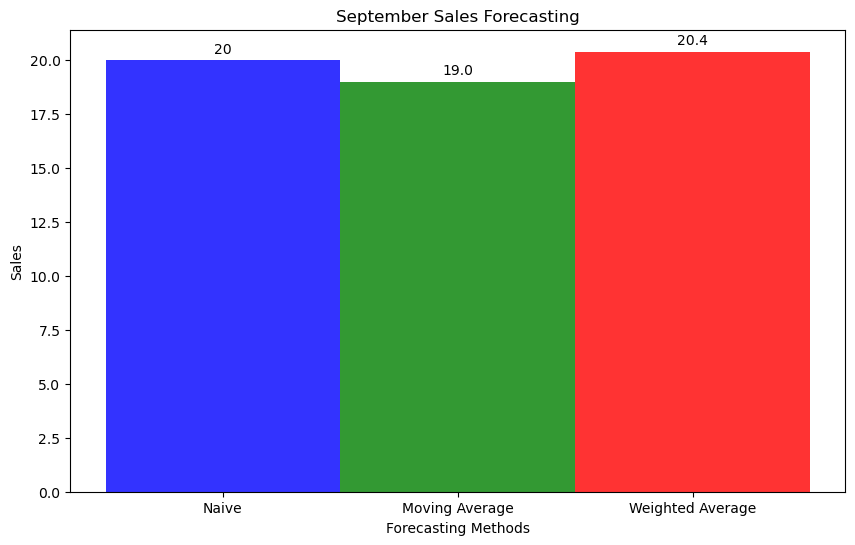

In [74]:
# Plot the September forecasts as a bar graph
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
opacity = 0.8

september_index = next_month

rects1 = ax.bar(1 - bar_width, naive_df.loc[september_index]['sales'], bar_width,
                alpha=opacity, color='b', label='Original')

rects2 = ax.bar(1, move_avg_df.loc[september_index]['sales'], bar_width,
                alpha=opacity, color='g', label='Moving Average')

rects3 = ax.bar(1 + bar_width, weight_avg_df.loc[september_index]['sales'], bar_width,
                alpha=opacity, color='r', label='Weighted Average')

autolabel(rects1, ax)
autolabel(rects2, ax)
autolabel(rects3, ax)

ax.set_xlabel('Forecasting Methods')
ax.set_ylabel('Sales')
ax.set_xticks([1 - bar_width, 1, 1 + bar_width])
ax.set_xticklabels(['Naive', 'Moving Average', 'Weighted Average'])
plt.title('September Sales Forecasting')

plt.show()